In [616]:
import os, os.path
import numpy as np
import pandas as pd
import data_structures as ds
import setup_analysis as sa
import support_functions as sf
import importlib
import time
import warnings
import matplotlib.pyplot as plt
importlib.reload(ds)
importlib.reload(sa)
importlib.reload(sf)
import sector_models as sm
importlib.reload(sm)

/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python


/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/data_structures.py:285: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector', 'key_varreqs_all'
  dict_vars_to_fields.update({var: self.build_varlist(subsector, variable_subsec = var)})
/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/data_structures.py:285: UserWarning: Invalid subsector attribute 'key_varreqs_all'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector'
  dict_vars_to_fields.update({var: self.build_varlist(subsector, variable_subsec = var)})
/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/data_structures.py:285: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector'
  dict_vars_to_fields.update({var: self.build_varlist(subsector,

<module 'sector_models' from '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/sector_models.py'>

In [614]:
model_afolu.model_attributes.dict_attributes["cat_agriculture"].table.columns

Index(['category_name', 'cat_agriculture', 'description', 'data_source',
       'hyperlink', 'notes', 'apply_vegetarian_exchange_scalar'],
      dtype='object')

In [619]:

#model_afolu.model_attributes.dict_attributes[]
def get_ordered_category_attribute(subsector, attribute):
    
    pycat = model_afolu.model_attributes.get_subsector_attribute(subsector, "pycategory_primary")
    attr_cur = model_afolu.model_attributes.dict_attributes[pycat]
    
    if attribute not in attr_cur.table.columns:
        raise ValueError(f"Missing attribute column '{attribute}': attribute not found in '{subsector}' attribute table.")
    
    # get the dictionary and order
    dict_map = sf.build_dict(attr_cur.table[[attr_cur.key, attribute]])
    return [dict_map[x] for x in attr_cur.key_values]

model_afolu.model_attributes.get_ordered_category_attribute("Agriculture", "apply_vegetarian_exchange_scalar")


[0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1]

In [622]:
importlib.reload(ds)
importlib.reload(sm)
#pd.DataFrame(a2).to_csv(os.path.join("example_transition_matrix.csv"), index = None, encoding = "UTF-8")

a2 = pd.read_csv(os.path.join(sa.dir_ref, "example_transition_matrix.csv"))
a2 = np.array(a2);


df_fake_data_base = pd.read_csv(os.path.join(sa.dir_ref, "fake_data", "fake_data_afolu.csv"))
df_fake_data_high_veg = pd.read_csv(os.path.join(sa.dir_ref, "fake_data", "fake_data_afolu-high_veg.csv"))
df_fake_data_high_veg_norealloc = pd.read_csv(os.path.join(sa.dir_ref, "fake_data", "fake_data_afolu-high_veg_norealloc.csv"))
df_fake_data_high_veg_allrealloc = pd.read_csv(os.path.join(sa.dir_ref, "fake_data", "fake_data_afolu-high_veg_allrealloc.csv"))

model_afolu = sm.AFOLU(sa.model_attributes)

df_out_base = model_afolu.project(df_fake_data_base)
df_out_high_veg = model_afolu.project(df_fake_data_high_veg)
df_out_high_veg_norealloc = model_afolu.project(df_fake_data_high_veg_norealloc)
df_out_high_veg_allrealloc = model_afolu.project(df_fake_data_high_veg_allrealloc)
#df_emissions_conv, arr_emissions_conv, arr_land_use, arrs_land_conv = model_afolu.project(df_fake_data)
#df_afolu = model_afolu.project(df_fake_data)




[[1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.   ]
 [1.    1.002 1.    1.    1.002 1.    1.002 1.002 1.002 1.002 1.002 1.002]
 [1.    1.004 1.    1.    1.004 1.    1.004 1.004 1.004 1.004 1.004 1.004]
 [1.    1.006 1.    1.    1.006 1.    1.006 1.006 1.006 1.006 1.006 1.006]
 [1.    1.008 1.    1.    1.008 1.    1.008 1.008 1.008 1.008 1.008 1.008]
 [1.    1.01  1.    1.    1.01  1.    1.01  1.01  1.01  1.01  1.01  1.01 ]
 [1.    1.012 1.    1.    1.012 1.    1.012 1.012 1.012 1.012 1.012 1.012]
 [1.    1.014 1.    1.    1.014 1.    1.014 1.014 1.014 1.014 1.014 1.014]
 [1.    1.016 1.    1.    1.016 1.    1.016 1.016 1.016 1.016 1.016 1.016]
 [1.    1.018 1.    1.    1.018 1.    1.018 1.018 1.018 1.018 1.018 1.018]
 [1.    1.02  1.    1.    1.02  1.    1.02  1.02  1.02  1.02  1.02  1.02 ]
 [1.    1.022 1.    1.    1.022 1.    1.022 1.022 1.022 1.022 1.022 1.022]
 [1.    1.024 1.    1.    1.024 1.    1.024 1.024 1.024 1.024 1.024 1.024]
 [1.    1.026 1.    1.   

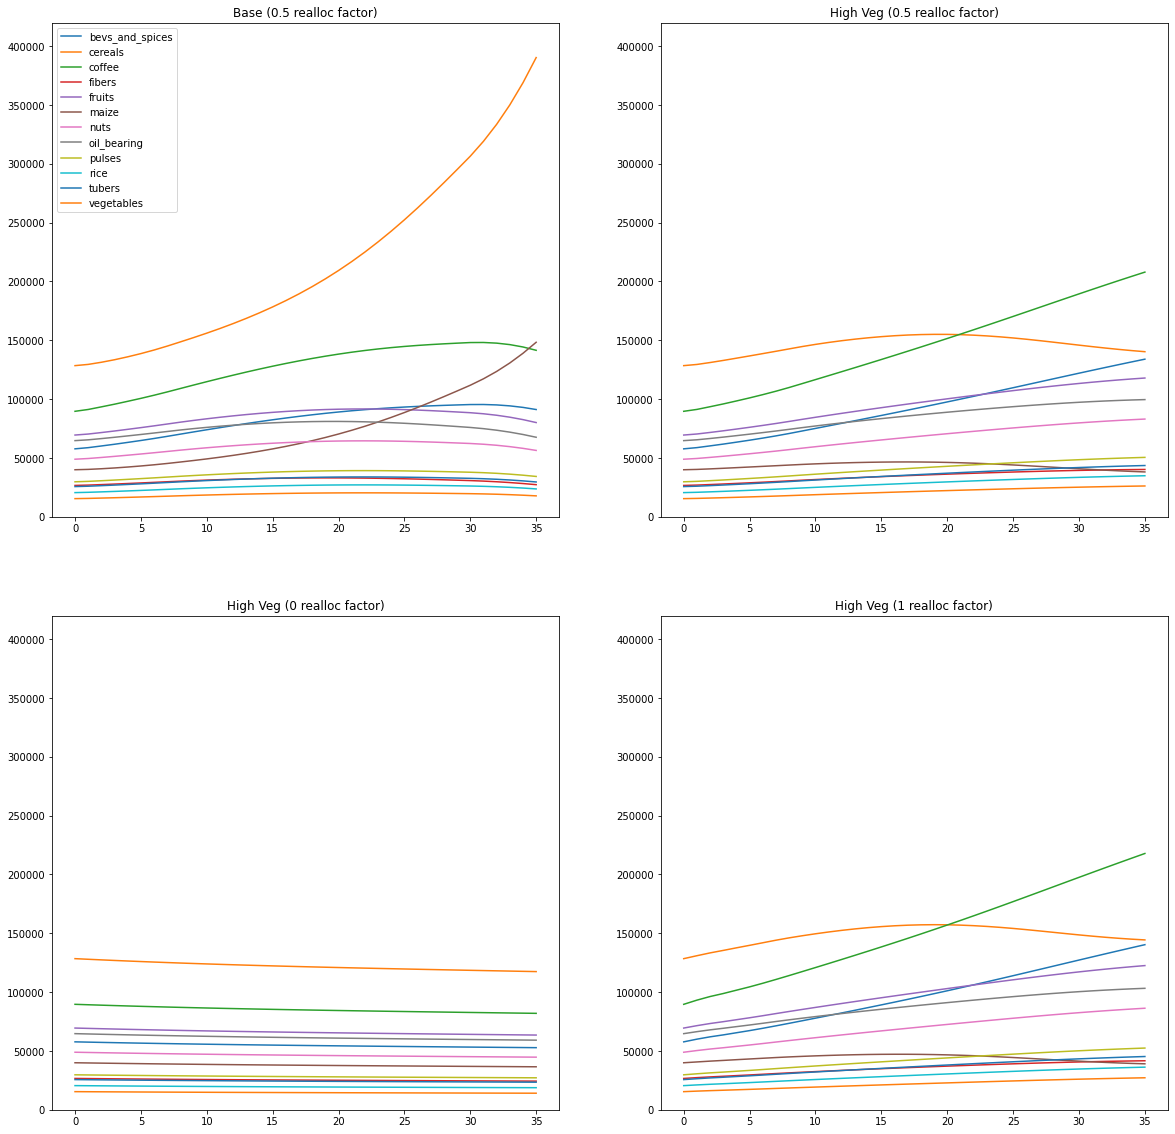

In [600]:
cols = [x for x in df_out.columns if "area_agrc" in x]

fig, ax = plt.subplots(2, 2, figsize = (20, 20))

for col in cols:
    x = np.array(df_out_base["time_period"])
    y = np.array(df_out_base[col])
    ax[0, 0].plot(x, y, label = col.replace("area_agrc_crops_", "").replace("_ha", ""))
    ax[0, 0].set_title("Base (0.5 realloc factor)")
    ax[0, 0].legend()
    ax[0, 0].set_ylim((0, 420000))
    
    x = np.array(df_out_high_veg["time_period"])
    y = np.array(df_out_high_veg[col])
    ax[0, 1].plot(x, y)
    ax[0, 1].set_title("High Veg (0.5 realloc factor)")
    ax[0, 1].set_ylim((0, 420000))
    
    
    x = np.array(df_out_high_veg_norealloc["time_period"])
    y = np.array(df_out_high_veg_norealloc[col])
    ax[1, 0].plot(x, y)
    ax[1, 0].set_title("High Veg (0 realloc factor)")
    ax[1, 0].set_ylim((0, 420000))
    
    x = np.array(df_out_high_veg_allrealloc["time_period"])
    y = np.array(df_out_high_veg_allrealloc[col])
    ax[1, 1].plot(x, y)
    ax[1, 1].set_title("High Veg (1 realloc factor)")
    ax[1, 1].set_ylim((0, 420000))
    
plt.show()

In [557]:
model_afolu.mat_ef[0][2,:]*model_afolu.arrs_land_conv[0][2,:]

array([0.33439754, 0.        , 0.        , 0.        , 0.38149695,
       0.02603067, 0.00375046, 0.        ])

In [567]:
#list(zip(df_out.columns, list(df_out.iloc[20,:])))
df_in = df_out.copy()
list_subsectors = model_afolu.required_base_subsectors
for subsector in list_subsectors:#self.required_base_subsectors:
    vars_subsec = model_afolu.model_attributes.dict_model_variables_by_subsector[subsector]
    # add subsector abbreviation
    fld_nam = model_afolu.model_attributes.get_subsector_attribute(subsector, "abv_subsector")
    fld_nam = f"emission_co2e_subsector_total_{fld_nam}"

    flds_add = []
    for var in vars_subsec:
        var_type = model_afolu.model_attributes.get_variable_attribute(var, "variable_type").lower()
        gas = model_afolu.model_attributes.get_variable_characteristic(var, model_afolu.model_attributes.varchar_str_emission_gas)
        if (var_type == "output") and gas:
            flds_add +=  model_afolu.model_attributes.dict_model_variables_to_variables[var]

    # check for missing fields; notify
    missing_fields = [x for x in flds_add if x not in df_in.columns]
    if len(missing_fields) > 0:
        str_mf = print_setdiff(set(df_in.columns), set(flds_add))
        str_mf = f"Missing fields {str_mf}.%s"
        if stop_on_missing_fields_q:
            raise ValueError(str_mf%(" Subsector emission totals will not be added."))
        else:
            warnings.warn(str_mf%(" Subsector emission totals will exclude these fields."))



In [573]:
df_in[flds_add].sum(axis = 1)

0     2.366778
1     2.379346
2     2.394496
3     2.407683
4     2.374892
5     2.340424
6     2.305170
7     2.269180
8     2.232911
9     2.196371
10    2.159027
11    2.120680
12    2.081157
13    2.040471
14    1.998729
15    1.955884
16    1.912000
17    1.867146
18    1.821436
19    1.774716
20    1.727163
21    1.678854
22    1.629842
23    1.580222
24    1.529984
25    1.479191
26    1.428024
27    1.376439
28    1.324527
29    1.272346
30    1.219982
31    1.176082
32    1.135193
33    1.093448
34    1.050852
35    1.007506
dtype: float64

In [502]:
# check for internal variables and add if necessary; note, this can be defined for different variables (see model attributes)
df_afolu_trajectories = df_fake_data.copy()
model_afolu.model_attributes.manage_pop_to_df(df_afolu_trajectories, "add")
df_afolu_trajectories.sort_values(by = [model_afolu.model_attributes.dim_time_period], inplace = True)
# check that all required fields are contained—assume that it is ordered by time period
model_afolu.check_df_fields(df_afolu_trajectories)


##  CATEGORY INITIALIZATION

pycat_agrc = model_afolu.model_attributes.get_subsector_attribute("Agriculture", "pycategory_primary")
pycat_frst = model_afolu.model_attributes.get_subsector_attribute("Forest", "pycategory_primary")
pycat_lndu = model_afolu.model_attributes.get_subsector_attribute("Land Use", "pycategory_primary")
pycat_lvst = model_afolu.model_attributes.get_subsector_attribute("Livestock", "pycategory_primary")
# attribute tables
attr_agrc = model_afolu.model_attributes.dict_attributes[pycat_agrc]
attr_frst = model_afolu.model_attributes.dict_attributes[pycat_frst]
attr_lndu = model_afolu.model_attributes.dict_attributes[pycat_lndu]
attr_lvst = model_afolu.model_attributes.dict_attributes[pycat_lvst]

##  FIELD INITIALIZATION

# get the gdp and total population fields
field_gdp = model_afolu.model_attributes.build_varlist("Economy", variable_subsec = model_afolu.modvar_econ_gdp)[0]
field_pop = model_afolu.model_attributes.build_varlist("General", variable_subsec = model_afolu.modvar_gnrl_pop_total)[0]


##  ECON/GNRL VECTOR AND ARRAY INITIALIZATION

# get some vectors
vec_gdp = model_afolu.model_attributes.get_standard_variables(df_afolu_trajectories, model_afolu.modvar_econ_gdp, False, return_type = "array_base")#np.array(df_afolu_trajectories[field_gdp])
vec_pop = model_afolu.model_attributes.get_standard_variables(df_afolu_trajectories, model_afolu.modvar_gnrl_pop_total, False, return_type = "array_base")
vec_gdp_per_capita = vec_gdp/vec_pop
# growth rates
vec_rates_gdp = vec_gdp[1:]/vec_gdp[0:-1] - 1
vec_rates_gdp_per_capita = vec_gdp_per_capita[1:]/vec_gdp_per_capita[0:-1] - 1


##  OUTPUT INITIALIZATION

df_out = [df_afolu_trajectories[model_afolu.required_dimensions].copy()]


# common indices
cat_lndu_ind_pstr = model_afolu.model_attributes.dict_attributes["cat_landuse"].get_key_value_index("grasslands")
cat_lndu_ind_crop = model_afolu.model_attributes.dict_attributes["cat_landuse"].get_key_value_index("croplands")

# area of the country
area = float(model_afolu.model_attributes.get_standard_variables(df_afolu_trajectories, model_afolu.modvar_gnrl_area, return_type = "array_base")[0])
# get the initial distribution of land
vec_modvar_lndu_initial_frac = model_afolu.model_attributes.get_standard_variables(df_afolu_trajectories, model_afolu.modvar_lndu_initial_frac, return_type = "array_base")[0]
vec_modvar_lndu_initial_area = vec_modvar_lndu_initial_frac*area
model_afolu.vec_modvar_lndu_initial_area = vec_modvar_lndu_initial_area
model_afolu.mat_trans_unadj, model_afolu.mat_ef = model_afolu.get_markov_matrices(df_afolu_trajectories)
# get some land use variables, including the land use reallocation factor
vec_lndu_yield_realloc_factor = model_afolu.model_attributes.get_standard_variables(df_afolu_trajectories, model_afolu.modvar_lndu_reallocation_factor, False, "array_base", var_bounds = (0, 1))


###########################
#    CALCULATE DEMANDS    #
###########################

##  livestock demands (calculated exogenously)

# variables requried to estimate demand
vec_modvar_lvst_pop_init = model_afolu.model_attributes.get_standard_variables(df_afolu_trajectories, model_afolu.modvar_lvst_pop_init, True, "array_base")[0]
fields_lvst_elas = model_afolu.model_attributes.switch_variable_category("Livestock", model_afolu.modvar_lvst_elas_lvst_demand, "demand_elasticity_category")
arr_lvst_elas_demand = np.array(df_afolu_trajectories[fields_lvst_elas])
# get the "vegetarian" factor and use to estimate livestock pop
vec_lvst_demscale = model_afolu.model_attributes.get_standard_variables(df_afolu_trajectories, model_afolu.modvar_lvst_frac_eating_red_meat, False, "array_base", var_bounds = (0, np.inf))
#vec_lvst_demscale = np.arange(36)*0.015
arr_lvst_dem_pop = model_afolu.project_per_capita_demand(vec_modvar_lvst_pop_init, vec_pop, vec_rates_gdp_per_capita, arr_lvst_elas_demand, vec_lvst_demscale, int)

# get weights for allocating grazing area and feed requirement to animals - based on first year only
vec_lvst_base_graze_weights = model_afolu.model_attributes.get_standard_variables(df_afolu_trajectories, model_afolu.modvar_lvst_dry_matter_consumption, True, "array_base")[0]
vec_lvst_feed_allocation_weights = (vec_modvar_lvst_pop_init*vec_lvst_base_graze_weights)/np.dot(vec_modvar_lvst_pop_init, vec_lvst_base_graze_weights)
# get information used to calculate carrying capacity of land
vec_lvst_carry_capacity_scale = model_afolu.model_attributes.get_standard_variables(df_afolu_trajectories, model_afolu.modvar_lvst_carrying_capacity_scalar, False, "array_base", var_bounds = (0, np.inf))


##  agricultural demands

# variables required for demand
arr_agrc_elas_crop_demand = model_afolu.model_attributes.get_standard_variables(df_afolu_trajectories, model_afolu.modvar_agrc_elas_crop_demand_income, False, "array_base")
arr_agrc_frac_feed = model_afolu.model_attributes.get_standard_variables(df_afolu_trajectories, model_afolu.modvar_agrc_frac_animal_feed, False, "array_base")
# get initial cropland area
area_agrc_cropland_init = area*vec_modvar_lndu_initial_frac[cat_lndu_ind_crop]
vec_agrc_frac_cropland_area = model_afolu.check_cropland_fractions(df_afolu_trajectories)[0]
vec_agrc_cropland_area = area_agrc_cropland_init*vec_agrc_frac_cropland_area

# estimate yield capacity
arr_agrc_yf = model_afolu.model_attributes.get_standard_variables(df_afolu_trajectories, model_afolu.modvar_agrc_yf, True, "array_base")
vec_agrc_yield_init = arr_agrc_yf[0]*vec_agrc_cropland_area
# split into yield for livestock feed (responsive to changes in livestock population) and yield for consumption and export (not)
vec_agrc_yield_init_lvstfeed = vec_agrc_yield_init*arr_agrc_frac_feed[0]
vec_agrc_yield_init_nonlvstfeed = vec_agrc_yield_init - vec_agrc_yield_init_lvstfeed
# project ag demand for crops that are driven by gdp/capita - set demand scalar for crop demand (increases based on reduction in red meat demand) - depends on how many people eat red meat (vec_lvst_demscale)
vec_agrc_diet_exchange_scalar = model_afolu.model_attributes.get_standard_variables(df_afolu_trajectories, model_afolu.modvar_lndu_vdes, False, "array_base", var_bounds = (0, np.inf))
vec_agrc_demscale = vec_lvst_demscale + vec_agrc_diet_exchange_scalar - vec_lvst_demscale*vec_agrc_diet_exchange_scalar
arr_agrc_nonfeeddem_yield = model_afolu.project_per_capita_demand(vec_agrc_yield_init_nonlvstfeed, vec_pop, vec_rates_gdp_per_capita, arr_agrc_elas_crop_demand, vec_agrc_demscale, float)

# array gives the total yield of crop type i allocated to livestock type j at time 0
arr_lndu_yield_i_reqd_lvst_j_init = np.outer(vec_agrc_yield_init_lvstfeed, vec_lvst_feed_allocation_weights)


model_afolu.project_integrated_land_use(
vec_modvar_lndu_initial_area,
model_afolu.mat_trans_unadj,
model_afolu.mat_ef,
arr_agrc_nonfeeddem_yield,
arr_agrc_yf,
arr_lndu_yield_i_reqd_lvst_j_init,
arr_lvst_dem_pop,
vec_agrc_frac_cropland_area,
vec_lndu_yield_realloc_factor,
vec_modvar_lvst_pop_init,
vec_lvst_feed_allocation_weights,
vec_lvst_carry_capacity_scale
)

/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/sector_models.py:352: RuntimeWarning: divide by zero encountered in true_divide
  # intilize output arrays, including land use, land converted, emissions, and adjusted transitions
/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/sector_models.py:384: RuntimeWarning: invalid value encountered in multiply
  vec_lvst_net_surplus = np.nan_to_num(arr_dem_lvst[i] - vec_lvst_prod_cur)


(array([[0.0936    , 0.2082    , 0.1453    , 0.0432    , 0.1126    ,
         0.0648    , 0.0793    , 0.1049    , 0.0482    , 0.0333    ,
         0.0416    , 0.025     ],
        [0.09408742, 0.2074082 , 0.14605664, 0.04312608, 0.1126198 ,
         0.06450837, 0.07931394, 0.1047535 , 0.04820847, 0.03330586,
         0.04160731, 0.0250044 ],
        [0.09442644, 0.20697514, 0.14658293, 0.04305577, 0.11259617,
         0.06436382, 0.0792973 , 0.10460748, 0.04819836, 0.03329887,
         0.04159858, 0.02499915],
        [0.09463257, 0.20682983, 0.14690292, 0.04299384, 0.11254447,
         0.06433448, 0.07926089, 0.10447403, 0.04817623, 0.03328358,
         0.04157949, 0.02498767],
        [0.09487016, 0.20672856, 0.14727173, 0.04291179, 0.11246386,
         0.06433348, 0.07920412, 0.10429535, 0.04814172, 0.03325974,
         0.0415497 , 0.02496977],
        [0.09507579, 0.20675471, 0.14759095, 0.04282235, 0.11235804,
         0.06438905, 0.0791296 , 0.10409775, 0.04809643, 0.03322844,
  

In [493]:
# project land use
vec_modvar_lndu_initial_frac = model_afolu.model_attributes.get_standard_variables(df_afolu_trajectories, model_afolu.modvar_lndu_initial_frac, return_type = "array_base")[0]

vec_initial_area = vec_modvar_lndu_initial_area
arrs_transitions = model_afolu.mat_trans_unadj
arrs_efs = model_afolu.mat_ef
# new vars to add to arg
arr_dem_lvst = arr_lvst_dem_pop
arr_agrc_nonfeeddem_yield = arr_agrc_nonfeeddem_yield
arr_lndu_yield_by_lvst = arr_lndu_yield_i_reqd_lvst_j_init
vec_agrc_frac_cropland_area = vec_agrc_frac_cropland_area
vec_lndu_yrf = vec_lndu_yield_realloc_factor
vec_lvst_pop_init = vec_modvar_lvst_pop_init
vec_lvst_pstr_weights = vec_lvst_feed_allocation_weights
vec_lvst_scale_cc = vec_lvst_carry_capacity_scale



def project_integrated_land_use(self, 
    vec_initial_area: np.ndarray, 
    arrs_transitions: np.ndarray, 
    arrs_efs: np.ndarray,
    arr_dem_lvst: np.ndarray,
    arr_agrc_nonfeeddem_yield: np.ndarray,
    arr_lndu_yield_by_lvst: np.ndarray,
    vec_agrc_frac_cropland_area: np.ndarray,
    vec_lndu_yrf: np.ndarray,
    vec_lvst_pop_init: np.ndarray,
    vec_lvst_pstr_weights: np.ndarray,
    vec_lvst_scale_cc: np.ndarray
):

    t0 = time.time()

    # check shapes
    model_afolu.check_markov_shapes(arrs_transitions, "arrs_transitions")
    model_afolu.check_markov_shapes(arrs_efs, "arrs_efs")

    # get attributes
    pycat_agrc = model_afolu.model_attributes.get_subsector_attribute("Agriculture", "pycategory_primary")
    attr_agrc = model_afolu.model_attributes.dict_attributes[pycat_agrc]
    pycat_lndu = model_afolu.model_attributes.get_subsector_attribute("Land Use", "pycategory_primary")
    attr_lndu = model_afolu.model_attributes.dict_attributes[pycat_lndu]
    pycat_lvst = model_afolu.model_attributes.get_subsector_attribute("Livestock", "pycategory_primary")
    attr_lvst = model_afolu.model_attributes.dict_attributes[pycat_lvst]
    # set some commonly called attributes and indices in arrays
    m = attr_lndu.n_key_values
    ind_crop = attr_lndu.get_key_value_index("croplands")
    ind_pstr = attr_lndu.get_key_value_index("grasslands")

    # initialize variables 
    arr_dem_lvst_gr = np.cumprod(arr_dem_lvst/arr_dem_lvst[0], axis = 0)
    vec_lvst_cc_init = vec_lvst_pop_init/(vec_initial_area[ind_pstr]*vec_lvst_pstr_weights)

    # intilize output arrays, including land use, land converted, emissions, and adjusted transitions
    arr_agrc_frac_cropland = np.array([vec_agrc_frac_cropland_area for k in range(model_afolu.n_time_periods)])
    arr_agrc_net_import_increase = np.zeros((model_afolu.n_time_periods, attr_agrc.n_key_values))
    arr_emissions_conv = np.zeros((model_afolu.n_time_periods, attr_lndu.n_key_values))
    arr_land_use = np.zeros((model_afolu.n_time_periods, attr_lndu.n_key_values))
    arr_lvst_net_import_increase = np.zeros((model_afolu.n_time_periods, attr_lvst.n_key_values))
    arrs_land_conv = np.zeros((model_afolu.n_time_periods, attr_lndu.n_key_values, attr_lndu.n_key_values))
    arrs_transitions_adj = np.zeros(arrs_transitions.shape)
    arrs_yields_per_livestock = np.array([arr_lndu_yield_i_reqd_lvst_j_init for k in range(model_afolu.n_time_periods)])

    # modify input arrays for loop

    # initialize running matrix of land use and iteration index i
    x = vec_initial_area
    i = 0


    while i < model_afolu.n_time_periods:
        # check emission factor index
        i_ef = i if (i < len(arrs_efs)) else len(arrs_efs) - 1
        if i_ef != i:
            print(f"No emission factor matrix found for time period {model_afolu.time_periods[i]}; using the matrix from period {len(arrs_efs) - 1}.")
        # check transition matrix index
        i_tr = i if (i < len(arrs_transitions)) else len(arrs_transitions) - 1
        if i_tr != i:
            print(f"No transition matrix found for time period {model_afolu.time_periods[i]}; using the matrix from period {len(arrs_efs) - 1}.")

        # calculate the unadjusted land use areas (projected to time step i + 1)
        area_crop_cur = x[ind_crop]
        area_pstr_cur = x[ind_pstr]
        vec_agrc_cropland_area_cur = area_crop_cur*arr_agrc_frac_cropland[i]

        # LIVESTOCK - calculate carrying capacities, demand used for pasture reallocation, and net surplus
        vec_lvst_cc_cur = vec_lvst_scale_cc[i]*vec_lvst_cc_init
        vec_lvst_prod_cur = vec_lvst_cc_cur*area_pstr_cur*vec_lvst_pstr_weights
        vec_lvst_net_surplus = np.nan_to_num(arr_dem_lvst[i] - vec_lvst_prod_cur)
        vec_lvst_reallocation = vec_lvst_net_surplus*vec_lndu_yrf[i] # demand for livestock met by reallocating land
        vec_lvst_net_import_increase = vec_lvst_net_surplus - vec_lvst_reallocation # demand for livestock met by increasing net imports (neg => net exports)

        # calculate required increase in transition probabilities
        area_lndu_pstr_increase = sum(np.nan_to_num(vec_lvst_reallocation/vec_lvst_cc_cur)) 
        scalar_lndu_pstr = (area_pstr_cur + area_lndu_pstr_increase)/np.dot(x, arrs_transitions[i_tr][:, ind_pstr])

        # AGRICULTURE - calculate demand increase in crops, which is a function of gdp/capita (exogenous) and livestock demand (used for feed)
        vec_agrc_feed_dem_yield = sum((arr_lndu_yield_by_lvst*arr_dem_lvst_gr[i]).transpose())
        vec_agrc_dem_cropareas = (arr_agrc_nonfeeddem_yield[i] + vec_agrc_feed_dem_yield)/arr_agrc_yf[i]
        vec_agrc_net_surplus_cropland_area_cur = vec_agrc_dem_cropareas - vec_agrc_cropland_area_cur
        vec_agrc_reallocation = vec_agrc_net_surplus_cropland_area_cur*vec_lndu_yrf[i]
        # get surplus yield (increase to net imports)
        vec_agrc_net_imports_increase_yield = (vec_agrc_net_surplus_cropland_area_cur - vec_agrc_reallocation)*arr_agrc_yf[i]
        vec_agrc_cropareas_adj = vec_agrc_cropland_area_cur + vec_agrc_reallocation
        scalar_lndu_crop = sum(vec_agrc_cropareas_adj)/np.dot(x, arrs_transitions[i_tr][:, ind_crop])

        # adjust the transition matrix
        trans_adj = model_afolu.adjust_transition_matrix(arrs_transitions[i_tr], {(ind_pstr, ): scalar_lndu_pstr, (ind_crop, ): scalar_lndu_crop})
        # calculate final land conversion and emissions
        arr_land_conv = (trans_adj.transpose()*x.transpose()).transpose()
        vec_emissions_conv = sum((trans_adj*arrs_efs[i_ef]).transpose()*x.transpose())

        # update arrays
        rng_agrc = list(range(i*attr_agrc.n_key_values, (i + 1)*attr_agrc.n_key_values))
        np.put(arr_agrc_net_import_increase, rng_agrc, np.round(vec_agrc_net_imports_increase_yield), 2)
        np.put(arr_agrc_frac_cropland, rng_agrc, vec_agrc_cropareas_adj/sum(vec_agrc_cropareas_adj))
        # non-ag arrays
        rng_put = np.arange(i*attr_lndu.n_key_values, (i + 1)*attr_lndu.n_key_values)
        np.put(arr_land_use, rng_put, x)
        np.put(arr_emissions_conv, rng_put, vec_emissions_conv)
        arr_lvst_net_import_increase[i] = np.round(vec_lvst_net_import_increase).astype(int)
        arrs_land_conv[i] = arr_land_conv
        arrs_transitions_adj[i] = trans_adj

        # update land use vector
        x = np.matmul(x, trans_adj)

        i += 1
        
    return (
        arr_agrc_frac_cropland, 
        arr_agrc_net_import_increase,
        arr_emissions_conv,
        arr_land_use,
        arr_lvst_net_import_increase,
        arrs_land_conv,
        arrs_transitions_adj,
        arrs_yields_per_livestock
    )
    
    


t1 = time.time()
t_elapse = round(t1 - t0, 2)
print(f"Land use projection complete in {t_elapse} seconds.")

    #return arr_emissions_conv, arr_land_use, arrs_land_conv

Land use projection complete in 0.07 seconds.


<ipython-input-493-98d7aa1326c1>:38: RuntimeWarning: divide by zero encountered in true_divide
  vec_lvst_cc_init = vec_lvst_pop_init/(vec_initial_area[ind_pstr]*vec_lvst_pstr_weights)
<ipython-input-493-98d7aa1326c1>:75: RuntimeWarning: invalid value encountered in multiply
  vec_lvst_prod_cur = vec_lvst_cc_cur*area_pstr_cur*vec_lvst_pstr_weights


In [495]:
arr_emissions_conv

array([[1.72217349e+01, 2.58616509e+03, 7.45675075e+03, 4.75404948e+03,
        7.90957977e+01, 3.02559430e+02, 0.00000000e+00, 0.00000000e+00],
       [9.21060202e+00, 2.59640175e+03, 7.30031217e+03, 4.81808862e+03,
        3.41667714e+01, 2.89068664e+02, 0.00000000e+00, 0.00000000e+00],
       [5.77085269e+00, 2.58734896e+03, 7.10205322e+03, 4.79427891e+03,
        2.14253493e+01, 2.60688885e+02, 0.00000000e+00, 0.00000000e+00],
       [4.68363503e+00, 2.56948639e+03, 6.88431941e+03, 4.73497382e+03,
        2.45717787e+01, 2.31394325e+02, 0.00000000e+00, 0.00000000e+00],
       [3.31070106e+00, 2.55167407e+03, 6.67073823e+03, 4.67541470e+03,
        2.38783004e+01, 2.07194259e+02, 0.00000000e+00, 0.00000000e+00],
       [2.33533676e+00, 2.53183334e+03, 6.45520700e+03, 4.60814865e+03,
        2.55276431e+01, 1.85988034e+02, 0.00000000e+00, 0.00000000e+00],
       [1.06087814e+00, 2.51194097e+03, 6.24299136e+03, 4.54008057e+03,
        2.47567265e+01, 1.68090565e+02, 0.00000000e+00, 0.

In [476]:
np.cumprod((arr_dem_lvst[0:3]/arr_dem_lvst[0])[:, 2])


array([1.        , 1.01281376, 1.03516245])

In [217]:
"""
a1 = np.round(arrs_transitions[i_tr], 5)
a2 = np.round(model_afolu.adjust_transition_matrix(arrs_transitions[i_tr], {(ind_pstr, ): scalar_lndu_pstr}), 5)

print("base:")
print(a1[:, ind_pstr])
print("\nAdjust with 0.5:")
print(a2[:, ind_pstr])
""";
arr_lvst_dem_gr

In [761]:
#arrs_land_conv
#sum(arr_lvst_rqd_land.transpose())
ab = [1, 2, 5, 9, -1]

ab.index(5)


m = model_afolu.model_attributes.dict_attributes["cat_landuse"].n_key_values
# indices in arrays
ind_pstr = model_afolu.model_attributes.dict_attributes["cat_landuse"].get_key_value_index("grasslands")
ind_crop = model_afolu.model_attributes.dict_attributes["cat_landuse"].get_key_value_index("croplands")

# get totals that need to be scaled
vec_prelim_pstr = arr_land_use[1:, ind_pstr]



In [614]:
#inds = [x for x in range(len)]
np.round((arrs_land_conv[0].transpose()/sum(arrs_land_conv[0].transpose())).transpose(), 3)





array([[0.944, 0.   , 0.   , 0.025, 0.022, 0.005, 0.002, 0.   ],
       [0.002, 0.991, 0.   , 0.   , 0.002, 0.001, 0.   , 0.003],
       [0.001, 0.   , 0.997, 0.   , 0.002, 0.   , 0.   , 0.   ],
       [0.008, 0.   , 0.001, 0.977, 0.012, 0.001, 0.   , 0.   ],
       [0.018, 0.   , 0.   , 0.018, 0.96 , 0.003, 0.001, 0.   ],
       [0.041, 0.002, 0.   , 0.051, 0.073, 0.792, 0.037, 0.004],
       [0.001, 0.   , 0.   , 0.001, 0.001, 0.002, 0.996, 0.   ],
       [0.006, 0.005, 0.   , 0.016, 0.006, 0.01 , 0.   , 0.957]])

In [608]:
model_afolu.model_attributes.dict_attributes["cat_landuse"].key_values

['croplands',
 'forests_mangroves',
 'forests_primary',
 'forests_secondary',
 'grasslands',
 'other',
 'settlements',
 'wetlands']

In [1497]:
class AFOLU:
    
    def __init__(self, attributes):
        
        self.model_attributes = attributes
        self.required_dimensions = self.get_required_dimensions()
        self.required_subsectors, self.required_base_subsectors = self.get_required_subsectors()
        self.required_variables, self.output_variables = self.get_afolu_input_output_fields()
        
        ##  set some model fields to connect to the attribute tables
        
        # agricultural model variables
        self.modvar_agrc_area_prop = "Cropland Area Proportion"
        self.modvar_agrc_area_crop = "Crop Area"
        self.modvar_agrc_ef_ch4 = ":math:\\text{CH}_4 Crop Activity Emission Factor"
        self.modvar_agrc_ef_n2o = ":math:\\text{CO}_2 Crop Activity Emission Factor"
        self.modvar_agrc_ef_co2 = ":math:\\text{N}_2\\text{O} Crop Activity Emission Factor"
        self.modvar_agrc_elas_crop_demand_income = "Crop Demand Income Elasticity"
        self.modvar_agrc_emissions_ch4_crops = ":math:\\text{CH}_4 Emissions from Crop Activity"
        self.modvar_agrc_emissions_co2_crops = ":math:\\text{CO}_2 Emissions from Crop Activity"
        self.modvar_agrc_emissions_n2o_crops = ":math:\\text{N}_2\\text{O} Emissions from Crop Activity"
        self.modvar_agrc_net_imports = "Crop Surplus Demand"
        self.modvar_agrc_yf = "Crop Yield Factor"
        self.modvar_agrc_yield = "Crop Yield"
        # forest model variables
        self.modvar_frst_elas_wood_demand = "Elasticity of Wood Products Demand to Value Added"
        self.modvar_frst_ef_fires = "Forest Fire Emission Factor"
        self.modvar_frst_ef_ch4 = "Forest Methane Emissions"
        self.modvar_frst_emissions_sequestration = ":math:\\text{CO}_2 Emissions from Forest Sequestration"
        self.modvar_frst_emissions_methane = ":math:\\text{CH}_4 Emissions from Forests"
        self.modvar_frst_sq_co2 = "Forest Sequestration Emission Factor"
        # land use model variables
        self.modvar_lndu_area_by_cat = "Land Use Area"
        self.modvar_lndu_ef_co2_conv = ":math:\\text{CO}_2 Land Use Conversion Emission Factor"
        self.modvar_lndu_emissions_conv = ":math:\\text{CO}_2 Emissions from Land Use Conversion"
        self.modvar_lndu_emissions_ch4_from_wetlands = ":math:\\text{CH}_4 Emissions from Wetlands"
        self.modvar_lndu_emissions_n2o_from_pastures = ":math:\\text{N}_2\\text{O} Emissions from Pastures"
        self.modvar_lndu_emissions_co2_from_pastures = ":math:\\text{CO}_2 Emissions from Pastures"
        self.modvar_lndu_initial_frac = "Initial Land Use Area Proportion"
        self.modvar_lndu_ef_ch4_boc = "Land Use BOC :math:\\text{CH}_4 Emission Factor"
        self.modvar_lndu_ef_n2o_past = "Land Use Pasture :math:\\text{N}_2\\text{O} Emission Factor"
        self.modvar_lndu_ef_co2_soilcarb = "Land Use Soil Carbon :math:\\text{CO}_2 Emission Factor"
        self.modvar_lndu_prob_transition = "Unadjusted Land Use Transition Probability"
        # livestock model variables
        self.modvar_lvst_carrying_capacity_scalar = "Carrying Capacity Scalar"
        self.modvar_lvst_dry_matter_consumption = "Daily Dry Matter Consumption"
        self.modvar_lvst_ef_ch4_ef = ":math:\\text{CH}_4 Enteric Fermentation Emission Factor"
        self.modvar_lvst_ef_ch4_mm = ":math:\\text{CH}_4 Manure Management Emission Factor"
        self.modvar_lvst_ef_n2o_mm = ":math:\\text{N}_2\\text{O} Manure Management Emission Factor"
        self.modvar_lvst_elas_lvst_demand = "Elasticity of Livestock Demand to GDP per Capita"
        self.modvar_lvst_emissions_ch4_ef = ":math:\\text{CH}_4 Emissions from Livestock Enteric Fermentation"
        self.modvar_lvst_emissions_ch4_mm = ":math:\\text{CH}_4 Emissions from Livestock Manure"
        self.modvar_lvst_emissions_n2o_mm = ":math:\\text{N}_2\\text{O} Emissions from Livestock Manure"
        self.modvar_lvst_frac_meat_import = "Fraction of Meat Consumption from Imports"
        self.modvar_lvst_meat_demand_scalar = "Red Meat Demand Scalar"
        self.modvar_lvst_net_imports = "Livestock Surplus Demand"
        self.modvar_lvst_pop = "Livestock Head Count"
        self.modvar_lvst_pop_init = "Initial Livestock Head Count"
        
        
        # economy and general variables
        self.modvar_econ_gdp = "GDP"
        self.modvar_econ_va = "Value Added"
        self.modvar_gnrl_area = "Area of Country"
        self.modvar_gnrl_occ = "National Occupation Rate"
        self.modvar_gnrl_subpop = "Population"
        self.modvar_gnrl_pop_total = "Total Population"
        
        ##  MISCELLANEOUS VARIABLES
        
        self.time_periods, self.n_time_periods = self.get_time_periods()
        
        # TEMP:SET TO DERIVE FROM ATTRIBUTE TABLES---
        self.cat_lu_crop = "croplands"
        self.cat_lu_grazing = "grasslands"
        self.varchar_str_emission_gas = "$EMISSION-GAS$"
        self.varchar_str_unit_mass = "$UNIT-MASS$"
        
    ##  FUNCTIONS FOR MODEL ATTRIBUTE DIMENSIONS
    
    def check_df_fields(self, df_afolu_trajectories):
        check_fields = self.required_variables
        # check for required variables
        if not set(check_fields).issubset(df_afolu_trajectories.columns):
            set_missing = list(set(check_fields) - set(df_afolu_trajectories.columns))
            set_missing = sf.format_print_list(set_missing)
            raise KeyError(f"AFOLU projection cannot proceed: The fields {set_missing} are missing.")
            
    
    def get_required_subsectors(self):
        subsectors = list(sf.subset_df(self.model_attributes.dict_attributes["abbreviation_subsector"].table, {"sector": ["AFOLU"]})["subsector"])
        subsectors_base = subsectors.copy()
        subsectors += ["Economy", "General"]
        return subsectors, subsectors_base
        
    def get_required_dimensions(self):
        ## TEMPORARY - derive from attributes later
        required_doa = [self.model_attributes.dim_time_period]
        return required_doa
    
    def get_afolu_input_output_fields(self):
        required_doa = [self.model_attributes.dim_time_period]
        required_vars, output_vars = self.model_attributes.get_input_output_fields(self.required_subsectors)
        return required_vars + self.get_required_dimensions(), output_vars

    
    # define a function to clean up code
    def get_standard_variables(self, df_in, modvar, override_vector_for_single_mv_q: bool = False, return_type: str = "data_frame"):
        flds = self.model_attributes.dict_model_variables_to_variables[modvar]
        flds = flds[0] if ((len(flds) == 1) and not override_vector_for_single_mv_q) else flds
        
        valid_rts = ["data_frame", "array_base", "array_units_corrected"]
        if return_type not in valid_rts:
            vrts = sf.format_print_list(valid_rts)
            raise ValueError(f"Invalid return_type in get_standard_variables: valid types are {vrts}.")
        
        # initialize output, apply various common transformations based on type
        out = df_in[flds]
        if return_type != "data_frame":
            out = np.array(out)
            if return_type == "array_units_corrected":
                out *= self.get_scalar(modvar, "total")
        
        return out
    
    
    def get_time_periods(self):
        pydim_time_period = self.model_attributes.get_dimensional_attribute("time_period", "pydim")
        time_periods = self.model_attributes.dict_attributes[pydim_time_period].key_values
        return time_periods, len(time_periods)
    
    
    ##  STREAMLINING FUNCTIONS
    
    # convert an array to a varibale out dataframe
    def array_to_df(self, arr_in, modvar: str, include_scalars = False) -> pd.DataFrame:
        # get subsector and fields to name based on variable
        subsector = self.model_attributes.dict_model_variable_to_subsector[modvar]
        fields = self.model_attributes.build_varlist(subsector, variable_subsec = modvar)
        
        scalar_em = 1
        scalar_me = 1
        if include_scalars:
            # get scalars
            gas = sa.model_attributes.get_variable_characteristic(modvar, self.varchar_str_emission_gas)
            mass = sa.model_attributes.get_variable_characteristic(modvar, self.varchar_str_unit_mass)
            # will conver ch4 to co2e e.g. + kg to MT
            scalar_em = 1 if not gas else self.model_attributes.get_gwp(gas.lower())
            scalar_me = 1 if not mass else self.model_attributes.get_mass_equivalent(mass.lower())
        
        # raise error if there's a shape mismatch
        if len(fields) != arr_in.shape[1]:
            flds_print = sf.format_print_list(fields)
            raise ValueError(f"Array shape mismatch for fields {flds_print}: the array only has {arr_in.shape[1]} columns.")

        return pd.DataFrame(arr_in*scalar_em*scalar_me, columns = fields)
    
    # some scalars
    def get_scalar(self, modvar: str, return_type: str = "total"):
        
        valid_rts = ["total", "gas", "mass"]
        if return_type not in valid_rts:
            tps = sf.format_print_list(valid_rts)
            raise ValueError(f"Invalid return type '{return_type}' in get_scalar: valid types are {tps}.")
        
        # get scalars
        gas = self.model_attributes.get_variable_characteristic(modvar, self.varchar_str_emission_gas)
        scalar_gas = 1 if not gas else self.model_attributes.get_gwp(gas.lower())
        #
        mass = self.model_attributes.get_variable_characteristic(modvar, self.varchar_str_unit_mass)
        scalar_mass = 1 if not mass else self.model_attributes.get_mass_equivalent(mass.lower())
    
        if return_type == "gas":
            out = scalar_gas
        elif return_type == "mass":
            out = scalar_mass
        elif return_type == "total":
            out = scalar_gas*scalar_mass
        
        return out
    
    # loop over a dictionary of simple variables that map an emission factor () to build out
    def get_simple_input_to_output_emission_arrays(self, df_ef: pd.DataFrame, df_driver: pd.DataFrame, dict_vars: dict, variable_driver: str):
        """
            NOTE: this only works w/in subsector
        """
        
        df_out = []
        subsector_driver = self.model_attributes.dict_model_variable_to_subsector[variable_driver]
        
        for var in dict_vars.keys():
            subsector_var = self.model_attributes.dict_model_variable_to_subsector[var]
            if subsector_driver != subsector_driver:
                warnings.warn(f"In get_simple_input_to_output_emission_arrays, driver variable '{variable_driver}' and emission variable '{var}' are in different sectors. This instance will be skipped.")
            else:
                # get emissions factor fields and apply scalar using get_standard_variables
                arr_ef = np.array(self.get_standard_variables(df_ef, var, True, "array_units_corrected"))
                # get the emissions driver array (driver must h)
                arr_driver = np.array(df_driver[sa.model_attributes.build_target_varlist_from_source_varcats(var, variable_driver)])
                df_out.append(self.array_to_df(arr_driver*arr_ef, dict_vars[var]))
                
        return df_out
    
    # add subsector emission totals
    def add_subsector_emissions_aggregates(self, df_in: pd.DataFrame, stop_on_missing_fields_q: bool = False):
        # loop over base subsectors
        for subsector in model_afolu.required_base_subsectors:
            vars_subsec = self.model_attributes.dict_model_variables_by_subsector[subsector]
            # add subsector abbreviation
            fld_nam = sa.model_attributes.get_subsector_attribute(subsector, "abv_subsector")
            fld_nam = f"emission_co2e_subsector_total_{fld_nam}"

            flds_add = []
            for var in vars_subsec:
                var_type = self.model_attributes.get_variable_attribute(var, "variable_type").lower()
                gas = self.model_attributes.get_variable_characteristic(var, "$EMISSION-GAS$")
                if (var_type == "output") and gas:
                    flds_add +=  self.model_attributes.dict_model_variables_to_variables[var]

            # check for missing fields; notify 
            missing_fields = [x for x in flds_add if x not in df_in.columns]
            if len(missing_fields) > 0:
                str_mf = print_setdiff(set(df_in.columns), set(flds_add))
                str_mf = f"Missing fields {str_mf}.%s"
                if stop_on_missing_fields_q:
                    raise ValueError(str_mf%(" Subsector emission totals will not be added."))
                else:
                    warnings.warn(str_mf%(" Subsector emission totals will exclude these fields."))

            keep_fields = [x for x in flds_add if x in df_in.columns]
            print(keep_fields)
            df_in[fld_nam] = df_in[keep_fields].sum(axis = 0)

    
    ######################################
    #    SUBSECTOR SPECIFIC FUNCTIONS    #
    ######################################
    
    
    ###   AGRICULTURE
    
    def check_cropland_fractions(self, df_in, thresh_for_correction: float = 0.01):
            
            arr = self.get_standard_variables(df_in, self.modvar_agrc_area_prop, True, "array_base")
            totals = sum(arr.transpose())
            m = max(np.abs(totals - 1))
            
            if m > thresh_for_correction:
                raise ValueError(f"Invalid crop areas found in check_cropland_fractions. The maximum fraction total was {m}; the maximum allowed deviation from 1 is {thresh_for_correction}.")
            else:
                arr = (arr.transpose()/totals).transpose()
            
            return arr
        
        
    ###   LAND USE
    
    ##  check the shape of transition/emission factor matrices sent to project_land_use
    def check_markov_shapes(self, arrs: np.ndarray, function_var_name:str):
            # get land use info
            pycat_lndu = self.model_attributes.get_subsector_attribute("Land Use", "pycategory_primary")
            attr_lndu = self.model_attributes.dict_attributes[pycat_lndu]
            
            if len(arrs.shape) < 3:
                raise ValueError(f"Invalid shape for array {function_var_name}; the array must be a list of square matrices.")
            elif arrs.shape[1:3] != (attr_lndu.n_key_values, attr_lndu.n_key_values):
                raise ValueError(f"Invalid shape of matrices in {function_var_name}. They must have shape ({attr_lndu.n_key_values}, {attr_lndu.n_key_values}).")
    
    ##  get the transition and emission factors matrices from the data frame
    def get_markov_matrices(self, df_ordered_trajectories, thresh_correct = 0.0001):
        """
            - assumes that the input data frame is ordered by time_period
            - thresh_correct is used to decide whether or not to correct the transition matrix (assumed to be row stochastic) to sum to 1; if the abs of the sum is outside this range, an error will be thrown
            - fields_pij and fields_efc will be properly ordered by categories for this transformation
        """
        
        fields_pij = self.model_attributes.dict_model_variables_to_variables[self.modvar_lndu_prob_transition]
        fields_efc = self.model_attributes.dict_model_variables_to_variables[self.modvar_lndu_ef_co2_conv]
        sf.check_fields(df_ordered_trajectories, fields_pij + fields_efc)

        pycat_landuse = self.model_attributes.get_subsector_attribute("Land Use", "pycategory_primary")

        n_categories = len(self.model_attributes.dict_attributes[pycat_landuse].key_values)

        # fetch arrays of transition probabilities and co2 emission factors
        arr_pr = np.array(df_ordered_trajectories[fields_pij])
        arr_pr = arr_pr.reshape((self.n_time_periods, n_categories, n_categories))
        arr_ef = np.array(df_ordered_trajectories[fields_efc])
        arr_ef = arr_ef.reshape((self.n_time_periods, n_categories, n_categories))

        return arr_pr, arr_ef
    
    ##  project land use
    def project_land_use(self, vec_initial_area: np.ndarray, arrs_transitions: np.ndarray, arrs_efs: np.ndarray):

        t0 = time.time()

        # check shapes
        self.check_markov_shapes(arrs_transitions, "arrs_transitions")
        self.check_markov_shapes(arrs_efs, "arrs_efs")

        # get land use info
        pycat_lndu = self.model_attributes.get_subsector_attribute("Land Use", "pycategory_primary")
        attr_lndu = self.model_attributes.dict_attributes[pycat_lndu]

        # intilize the land use and conversion emissions array
        shp_init = (self.n_time_periods, attr_lndu.n_key_values)
        arr_land_use = np.zeros(shp_init)
        arr_emissions_conv = np.zeros(shp_init)
        arrs_land_conv = np.zeros((self.n_time_periods, attr_lndu.n_key_values, attr_lndu.n_key_values))

        # running matrix Q_i; initialize as identity. initialize running matrix of land use are
        Q_i = np.identity(attr_lndu.n_key_values)
        x = vec_initial_area
        i = 0

        while i < self.n_time_periods:

            # check emission factor index
            i_ef = i if (i < len(arrs_efs)) else len(arrs_efs) - 1
            if i_ef != i:
                print(f"No emission factor matrix found for time period {self.time_periods[i]}; using the matrix from period {len(arrs_efs) - 1}.")
            # check transition matrix index
            i_tr = i if (i < len(arrs_transitions)) else len(arrs_transitions) - 1
            if i_tr != i:
                print(f"No transition matrix found for time period {self.time_periods[i]}; using the matrix from period {len(arrs_efs) - 1}.")

            # calculate land use, conversions, and emissions
            vec_land_use = np.matmul(vec_initial_area, Q_i)
            vec_emissions_conv = sum((arrs_transitions[i_tr] * arrs_efs[i_ef]).transpose()*x.transpose())
            arr_land_conv = (arrs_transitions[i_tr].transpose()*x.transpose()).transpose()

            # update matrices
            rng_put = np.arange(i*attr_lndu.n_key_values, (i + 1)*attr_lndu.n_key_values)
            np.put(arr_land_use, rng_put, vec_land_use)
            np.put(arr_emissions_conv, rng_put, vec_emissions_conv)
            np.put(arrs_land_conv, np.arange(i*attr_lndu.n_key_values**2, (i + 1)*attr_lndu.n_key_values**2), arr_land_conv)

            # update transition matrix and land use matrix
            Q_i = np.matmul(Q_i, arrs_transitions[i_tr])
            x = vec_land_use

            i += 1

        t1 = time.time()
        t_elapse = round(t1 - t0, 2)
        print(f"Land use projection complete in {t_elapse} seconds.")

        return arr_emissions_conv, arr_land_use, arrs_land_conv

    
    ##  LIVESTOCK
    
    
    def reassign_pops_from_proj_to_carry(self, arr_lu_derived, arr_dem_based):
        """
            Before assigning net imports, there are many non-grazing animals to consider (note that these animals are generally not emission-intensive animals)
            Due to 0 graze area, their estimated population is infinite, or stored as a negative
            We assign their population as the demand-estimated population
        """
        if arr_lu_derived.shape != arr_dem_based.shape:
            raise ValueError(f"Error in reassign_pops_from_proj_to_carry: array dimensions do not match: arr_lu_derived = {arr_lu_derived.shape}, arr_dem_based = {arr_dem_based.shape}.")

        cols = np.where(arr_lu_derived[0] < 0)[0]
        n_row, n_col = arr_lu_derived.shape

        for w in cols:
            rng = np.arange(w*n_row, (w + 1)*n_row)
            np.put(arr_lu_derived.transpose(), rng, arr_dem_based[:, w])

        return arr_lu_derived
    
    
    
    ####################################
    ###                              ###
    ###    PRIMARY MODEL FUNCTION    ###
    ###                              ###
    ####################################
            
    def project(self, df_afolu_trajectories):
        
        """
            - AFOLU.project takes a data frame (ordered by time series) and returns a data frame of the same order
            - designed to be parallelized or called from command line via __main__ in run_afolu.py
        """
        
        ##  CHECKS 
        
        # check for internal variables and add if necessary; note, this can be defined for different variables (see model attributes)
        self.model_attributes.manage_pop_to_df(df_afolu_trajectories, "add")
        df_afolu_trajectories.sort_values(by = [self.model_attributes.dim_time_period], inplace = True)
        # check that all required fields are contained—assume that it is ordered by time period
        self.check_df_fields(df_afolu_trajectories)
        
        
        ##  CATEGORY INITIALIZATION
        
        pycat_agrc = self.model_attributes.get_subsector_attribute("Agriculture", "pycategory_primary")
        pycat_frst = self.model_attributes.get_subsector_attribute("Forest", "pycategory_primary")
        pycat_lndu = self.model_attributes.get_subsector_attribute("Land Use", "pycategory_primary")
        pycat_lvst = self.model_attributes.get_subsector_attribute("Livestock", "pycategory_primary")
        # attribute tables
        attr_agrc = self.model_attributes.dict_attributes[pycat_agrc]
        attr_frst = self.model_attributes.dict_attributes[pycat_frst]
        attr_lndu = self.model_attributes.dict_attributes[pycat_lndu]
        attr_lvst = self.model_attributes.dict_attributes[pycat_lvst]
        
        ##  FIELD INITIALIZATION
        
        # get the gdp and total population fields
        field_gdp = self.model_attributes.build_varlist("Economy", variable_subsec = self.modvar_econ_gdp)[0]
        field_pop = self.model_attributes.build_varlist("General", variable_subsec = self.modvar_gnrl_pop_total)[0]
        
        
        ##  ECON/GNRL VECTOR AND ARRAY INITIALIZATION
        
        # get some vectors
        vec_gdp = self.get_standard_variables(df_afolu_trajectories, self.modvar_econ_gdp, False, return_type = "array_base")#np.array(df_afolu_trajectories[field_gdp])
        vec_pop = self.get_standard_variables(df_afolu_trajectories, self.modvar_gnrl_pop_total, False, return_type = "array_base")
        vec_gdp_per_capita = vec_gdp/vec_pop
        # growth rates
        vec_rates_gdp = vec_gdp[1:]/vec_gdp[0:-1] - 1
        vec_rates_gdp_per_capita = vec_gdp_per_capita[1:]/vec_gdp_per_capita[0:-1] - 1

        
        ##  OUTPUT INITIALIZATION
        
        df_out = [df_afolu_trajectories[self.required_dimensions].copy()]
        
        
        
        ##################
        #    LAND USE    #
        ##################
        
        # area of the country
        area = float(self.get_standard_variables(df_afolu_trajectories, self.modvar_gnrl_area, return_type = "array_base")[0])
    
        ##  LU MARKOV
        
        # get the initial distribution of land
        vec_modvar_lndu_initial_frac = self.get_standard_variables(df_afolu_trajectories, self.modvar_lndu_initial_frac, return_type = "array_base")[0]
        vec_modvar_lndu_initial_area = vec_modvar_lndu_initial_frac*area
        self.vec_modvar_lndu_initial_area = vec_modvar_lndu_initial_area
        self.mat_trans, self.mat_ef = self.get_markov_matrices(df_afolu_trajectories)
        # get land use projections (np arrays) - note, arrs_land_conv returns a list of matrices for troubleshooting
        arr_lndu_emissions_conv, arr_land_use, arrs_land_conv = self.project_land_use(vec_modvar_lndu_initial_area, *self.get_markov_matrices(df_afolu_trajectories))
        # scale emissions
        arr_lndu_emissions_conv *= self.get_scalar(self.modvar_lndu_ef_co2_conv, "total")
        df_lndu_emissions_conv = self.array_to_df(arr_lndu_emissions_conv, self.modvar_lndu_emissions_conv)
        df_land_use = self.array_to_df(arr_land_use, self.modvar_lndu_area_by_cat)
        # add to output data frame
        df_out.append(df_lndu_emissions_conv)
        df_out.append(df_land_use)
        
        ##  EXISTENCE EMISSIONS FOR OTHER LANDS, INCLUDING AG ACTIVITY ON PASTURES
        
        # dictionary variables mapping emission factor variables to output variables
        dict_modvars_lndu_simple_efs = {
            self.modvar_lndu_ef_n2o_past: self.modvar_lndu_emissions_n2o_from_pastures, 
            self.modvar_lndu_ef_co2_soilcarb: self.modvar_lndu_emissions_co2_from_pastures, 
            self.modvar_lndu_ef_ch4_boc: self.modvar_lndu_emissions_ch4_from_wetlands
        }
        # add to output dataframe
        df_out += self.get_simple_input_to_output_emission_arrays(df_afolu_trajectories, df_land_use, dict_modvars_lndu_simple_efs, self.modvar_lndu_area_by_cat)


        
        ##################
        #    FORESTRY    #
        ##################
        
        # get ordered fields from land use
        fields_lndu_forest_ordered = [self.model_attributes.matchstring_landuse_to_forests + x for x in self.model_attributes.dict_attributes[pycat_frst].key_values]
        arr_area_frst = np.array(df_land_use[self.model_attributes.build_varlist("Land Use", variable_subsec = self.modvar_lndu_area_by_cat, restrict_to_category_values = fields_lndu_forest_ordered)])
        # get different variables
        arr_frst_ef_sequestration = self.get_standard_variables(df_afolu_trajectories, self.modvar_frst_sq_co2, True, "array_units_corrected")
        arr_frst_ef_methane = self.get_standard_variables(df_afolu_trajectories, self.modvar_frst_ef_ch4, True, "array_units_corrected")
        # build output variables 
        df_out += [
            self.array_to_df(-1*arr_area_frst*arr_frst_ef_sequestration, self.modvar_frst_emissions_sequestration),
            self.array_to_df(arr_area_frst*arr_frst_ef_methane, self.modvar_frst_emissions_methane)
        ]
        
        ##  NEEDED: FOREST FIRES (ADD HERE)
        ##  NEEDED: WOOD PRODUCTS (ADD HERE)
        
        
        
        #####################
        #    AGRICULTURE    #
        #####################
        
        # get area of cropland
        field_crop_array = self.model_attributes.build_varlist("Land Use", variable_subsec = self.modvar_lndu_area_by_cat, restrict_to_category_values = [self.cat_lu_crop])[0]
        vec_cropland_area = np.array(df_land_use[field_crop_array])
        # fraction of cropland represented by each crop
        arr_agrc_frac_cropland_area = self.check_cropland_fractions(df_afolu_trajectories)
        arr_agrc_crop_area = (arr_agrc_frac_cropland_area.transpose()*vec_cropland_area.transpose()).transpose()
        # area-corrected emission factors
        arr_agrc_ef_ch4 = self.get_standard_variables(df_afolu_trajectories, self.modvar_agrc_ef_ch4, True, "array_units_corrected")
        arr_agrc_ef_co2 = self.get_standard_variables(df_afolu_trajectories, self.modvar_agrc_ef_co2, True, "array_units_corrected")
        arr_agrc_ef_n2o = self.get_standard_variables(df_afolu_trajectories, self.modvar_agrc_ef_n2o, True, "array_units_corrected")
        # estimate yield capacity
        arr_agrc_yf = self.get_standard_variables(df_afolu_trajectories, self.modvar_agrc_yf, True, "array_base")
        arr_yield = arr_agrc_yf*arr_agrc_crop_area
        # estimate demand for crops (used in CBA)
        arr_agrc_elas_crop_demand = self.get_standard_variables(df_afolu_trajectories, self.modvar_agrc_elas_crop_demand_income, False, "array_base")
        arr_agrc_yield_dem_scale_proj = (vec_rates_gdp_per_capita.transpose()*arr_agrc_elas_crop_demand[0:-1].transpose()).transpose()
        arr_agrc_yield_dem_scale_proj = np.cumprod(1 + arr_agrc_yield_dem_scale_proj, axis = 0)
        arr_agrc_yield_dem_scale_proj = np.concatenate([np.ones((1,len(arr_agrc_yield_dem_scale_proj[0]))), arr_agrc_yield_dem_scale_proj])
        # estimate net imports (surplus demand)
        arr_agrc_net_imports = arr_agrc_yield_dem_scale_proj*arr_yield[0] - arr_yield
        # add to output dataframe
        df_out += [
            self.array_to_df(arr_agrc_crop_area, self.modvar_agrc_area_crop),
            self.array_to_df(arr_yield, self.modvar_agrc_yield),
            self.array_to_df(arr_agrc_ef_ch4, self.modvar_agrc_emissions_ch4_crops),
            self.array_to_df(arr_agrc_ef_co2, self.modvar_agrc_emissions_co2_crops),
            self.array_to_df(arr_agrc_ef_n2o, self.modvar_agrc_emissions_n2o_crops),
            self.array_to_df(arr_agrc_net_imports, self.modvar_agrc_net_imports)
        ]

        
        
        ###################
        #    LIVESTOCK    #
        ###################

        # get area of grassland/pastures
        field_lvst_graze_array = self.model_attributes.build_varlist("Land Use", variable_subsec = self.modvar_lndu_area_by_cat, restrict_to_category_values = [self.cat_lu_grazing])[0]
        vec_lvst_graze_area = np.array(df_land_use[field_lvst_graze_array])
        # get weights for allocating grazing area to animals - based on first year only
        vec_lvst_base_graze_weights = self.get_standard_variables(df_afolu_trajectories, self.modvar_lvst_dry_matter_consumption, True, "array_base")[0]
        vec_modvar_lvst_pop_init = self.get_standard_variables(df_afolu_trajectories, self.modvar_lvst_pop_init, True, "array_base")[0]
        vec_lvst_grassland_allocation_weights = (vec_modvar_lvst_pop_init*vec_lvst_base_graze_weights)/np.dot(vec_modvar_lvst_pop_init, vec_lvst_base_graze_weights)
        # estimate the total area used for grazing, then get the number of livestock/area
        arr_lvst_graze_area = np.outer(vec_lvst_graze_area, vec_lvst_grassland_allocation_weights)
        vec_lvst_carry_capacity_scale = self.get_standard_variables(df_afolu_trajectories, self.modvar_lvst_carrying_capacity_scalar, False, "array_base")
        vec_lvst_carry_capacity = vec_modvar_lvst_pop_init/arr_lvst_graze_area[0]
        arr_lvst_carry_capacity = np.outer(vec_lvst_carry_capacity_scale, vec_lvst_carry_capacity)
        # estimate the total number of livestock that are raised, then get emission factors
        arr_lvst_pop = np.array(arr_lvst_carry_capacity*arr_lvst_graze_area).astype(int)
        arr_lvst_emissions_ch4_ef = self.get_standard_variables(df_afolu_trajectories, self.modvar_lvst_ef_ch4_ef, True, "array_units_corrected")
        arr_lvst_emissions_ch4_mm = self.get_standard_variables(df_afolu_trajectories, self.modvar_lvst_ef_ch4_mm, True, "array_units_corrected")
        arr_lvst_emissions_n2o_mm = self.get_standard_variables(df_afolu_trajectories, self.modvar_lvst_ef_n2o_mm, True, "array_units_corrected")
        # estimate demand for livestock (used in CBA)
        fields_lvst_elas = self.model_attributes.switch_variable_category("Livestock", self.modvar_lvst_elas_lvst_demand, "demand_elasticity_category")
        arr_lvst_elas_demand = np.array(df_afolu_trajectories[fields_lvst_elas])
        # get the demand scalar, then apply to the initial population
        arr_lvst_dem_scale_proj = (vec_rates_gdp_per_capita.transpose()*arr_lvst_elas_demand[0:-1].transpose()).transpose()
        arr_lvst_dem_scale_proj = np.cumprod(1 + arr_lvst_dem_scale_proj, axis = 0)
        arr_lvst_dem_scale_proj= np.concatenate([np.ones((1,len(arr_lvst_dem_scale_proj[0]))), arr_lvst_dem_scale_proj])
        arr_lvst_dem_pop = np.array(arr_lvst_dem_scale_proj*vec_modvar_lvst_pop_init).astype(int)
        # clean the population and grab net imports
        arr_lvst_pop = self.reassign_pops_from_proj_to_carry(arr_lvst_pop, arr_lvst_dem_pop)
        arr_lvst_net_imports = arr_lvst_dem_pop - arr_lvst_pop
        
        # add to output dataframe
        df_out += [
            self.array_to_df(arr_lvst_emissions_ch4_ef*arr_lvst_pop, self.modvar_lvst_emissions_ch4_ef),
            self.array_to_df(arr_lvst_emissions_ch4_mm*arr_lvst_pop, self.modvar_lvst_emissions_ch4_mm),
            self.array_to_df(arr_lvst_emissions_n2o_mm*arr_lvst_pop, self.modvar_lvst_emissions_n2o_mm),
            self.array_to_df(arr_lvst_pop, self.modvar_lvst_pop),
            self.array_to_df(arr_lvst_net_imports, self.modvar_lvst_net_imports)
        ]


        df_out = pd.concat(df_out, axis = 1).reset_index(drop = True)
        self.add_subsector_emissions_aggregates(df_out, False)
        
        return df_out


model_afolu = AFOLU(sa.model_attributes)   
#df_emissions_conv, arr_emissions_conv, arr_land_use, arrs_land_conv = model_afolu.project(df_fake_data)

df_afolu = model_afolu.project(df_fake_data)





Land use projection complete in 0.0 seconds.
['emission_co2e_ch4_agrc_crop_activity_bevs_and_spices', 'emission_co2e_ch4_agrc_crop_activity_cereals', 'emission_co2e_ch4_agrc_crop_activity_coffee', 'emission_co2e_ch4_agrc_crop_activity_fibers', 'emission_co2e_ch4_agrc_crop_activity_fruits', 'emission_co2e_ch4_agrc_crop_activity_maize', 'emission_co2e_ch4_agrc_crop_activity_nuts', 'emission_co2e_ch4_agrc_crop_activity_oil_bearing', 'emission_co2e_ch4_agrc_crop_activity_pulses', 'emission_co2e_ch4_agrc_crop_activity_rice', 'emission_co2e_ch4_agrc_crop_activity_tubers', 'emission_co2e_ch4_agrc_crop_activity_vegetables', 'emission_co2e_co2_agrc_crop_activity_bevs_and_spices', 'emission_co2e_co2_agrc_crop_activity_cereals', 'emission_co2e_co2_agrc_crop_activity_coffee', 'emission_co2e_co2_agrc_crop_activity_fibers', 'emission_co2e_co2_agrc_crop_activity_fruits', 'emission_co2e_co2_agrc_crop_activity_maize', 'emission_co2e_co2_agrc_crop_activity_nuts', 'emission_co2e_co2_agrc_crop_activity_oi

<ipython-input-1497-6673da99724a>:541: RuntimeWarning: divide by zero encountered in true_divide
  vec_lvst_carry_capacity = vec_modvar_lvst_pop_init/arr_lvst_graze_area[0]
<ipython-input-1497-6673da99724a>:544: RuntimeWarning: invalid value encountered in multiply
  arr_lvst_pop = np.array(arr_lvst_carry_capacity*arr_lvst_graze_area).astype(int)


In [1487]:
if True and "tmp":
    print("tmp")
    
if "this":
    print("n")

tmp
n


In [1475]:
#importlib.reload(sa)
np.where(np.array(df_afolu[["net_imports_lvst_mules", "net_imports_lvst_goats"]])[1] <= 850)[0]
#model_afolu.get_standard_variables(df_afolu_trajectories, self.modvar_frst_sq_co2, True, "array_units_corrected")
df_afolu

,time_period,emission_co2e_co2_lndu_conversion_croplands,emission_co2e_co2_lndu_conversion_forests_mangroves,emission_co2e_co2_lndu_conversion_forests_primary,emission_co2e_co2_lndu_conversion_forests_secondary,emission_co2e_co2_lndu_conversion_grasslands,emission_co2e_co2_lndu_conversion_other,emission_co2e_co2_lndu_conversion_settlements,emission_co2e_co2_lndu_conversion_wetlands,area_lndu_croplands_ha,...,lvst_pop_sheep,net_imports_lvst_buffalo,net_imports_lvst_cattle_dairy,net_imports_lvst_cattle_nondairy,net_imports_lvst_chickens,net_imports_lvst_goats,net_imports_lvst_horses,net_imports_lvst_mules,net_imports_lvst_pigs,net_imports_lvst_sheep
0,0,0.019672,2.570034,7.393933,4.711562,0.179815,0.302081,0.0,0.0,616993.159871,...,2890,0,0,0,0,0,0,0,0,0
1,1,0.019672,2.557157,7.192800,4.711562,0.179815,0.302081,0.0,0.0,614464.100378,...,2852,108,5683,29943,0,654,3290,137,0,76
2,2,0.019591,2.560487,6.972449,4.806600,0.177499,0.303917,0.0,0.0,611911.218608,...,2817,201,10979,55460,0,1210,6083,254,0,139
3,3,0.019510,2.563476,6.753892,4.897856,0.175284,0.305187,0.0,0.0,609339.316148,...,2783,279,15926,76977,0,1676,8425,353,0,193
4,4,0.019428,2.566148,6.537072,4.985451,0.173163,0.306013,0.0,0.0,606753.019188,...,2750,361,20739,99487,0,2167,10887,455,0,250
5,5,0.019345,2.568459,6.321908,5.069506,0.171129,0.306493,0.0,0.0,604156.713440,...,2719,439,25351,121072,0,2637,13250,554,0,303
6,6,0.019262,2.570436,6.108347,5.150142,0.169179,0.306702,0.0,0.0,601554.486777,...,2688,519,29825,143144,0,3119,15675,656,0,360
7,7,0.019179,2.572084,5.896312,5.227474,0.167307,0.306702,0.0,0.0,598950.109019,...,2660,599,34155,165278,0,3605,18115,758,0,415
8,8,0.019096,2.573407,5.685747,5.301615,0.165509,0.306538,0.0,0.0,596347.008255,...,2632,681,38366,188024,0,4105,20629,863,0,473
9,9,0.019013,2.574413,5.476580,5.372676,0.163780,0.306250,0.0,0.0,593748.275640,...,2605,766,42463,211305,0,4620,23214,971,0,532


In [1401]:
importlib.reload(sa)
x = np.array(df_afolu["area_lu_forests_primary_ha"])
x[1:]/x[0:-1]
x

TypeError: argument of type 'float' is not iterable

In [1381]:
v0 = model_afolu.vec_modvar_lndu_initial_area
print(v0)
v1 = np.matmul(v0.transpose(), model_afolu.mat_trans[0]) 
v1

[ 616993.1598707   47038.270236  2182474.3564036  921565.2182493
 1201174.0486769   38783.2520956   79975.8327029   25095.861765 ]


array([ 614464.10037797,   47337.91381518, 2176473.27228397,
        940154.39268358, 1185708.23140438,   39018.9640872 ,
         84655.8955838 ,   25287.23755801])

In [1380]:
v2 = np.matmul(v1.transpose(), model_afolu.mat_trans[1]) 
v2

array([ 611911.21860754,   47634.25913537, 2170695.21739169,
        958003.58246282, 1170909.91260718,   39181.96493745,
         89296.55500274,   25467.30705614])

In [1283]:
df_afolu
modvar = model_afolu.modvar_lndu_ef_n2o_past

mass = sa.model_attributes.get_variable_characteristic(modvar, "$UNIT-MASS$")
scalar_mass = 1 if not mass else sa.model_attributes.get_mass_equivalent(mass.lower())

gas = sa.model_attributes.get_variable_characteristic(modvar, "$EMISSION-GAS$")
scalar_gas = 1 if not gas else sa.model_attributes.get_gwp(gas.lower())
scalar_mass*scalar_gas
model_afolu.get_scalar(modvar, "total")

0.273

In [1263]:
importlib.reload(sa)
sa.model_attributes.dict_model_variable_to_category_restriction[model_afolu.modvar_lndu_ef_n2o_past]
sa.model_attributes.separate_varreq_dict_for_outer("Land Use", "key_varreqs_all", ("$CAT-LANDUSE-I$", "$CAT-LANDUSE-J$"))#, variable_type = var_type)
sa.model_attributes.dict_model_variables_by_subsector["Land Use"]#[model_afolu.modvar_lndu_ef_n2o_past]



#get_variable_attribute(model_afolu.modvar_lndu_ef_n2o_past, "categories")
#sa.model_attributes.dict_varreqs["partial_category_af_lndu"].field_maps

[':math:\\text{CH}_4 Emissions from Wetlands',
 ':math:\\text{CO}_2 Emissions from Land Use Conversion',
 ':math:\\text{CO}_2 Emissions from Pastures',
 ':math:\\text{CO}_2 Land Use Conversion Emission Factor',
 ':math:\\text{N}_2\\text{O} Emissions from Pastures',
 'Initial Land Use Area Proportion',
 'Land Use Area',
 'Land Use BOC :math:\\text{CH}_4 Emission Factor',
 'Land Use Pasture :math:\\text{N}_2\\text{O} Emission Factor',
 'Land Use Soil Carbon :math:\\text{CO}_2 Emission Factor',
 'Unadjusted Land Use Transition Probability']

In [1253]:
importlib.reload(sa)
#sa.model_attributes.dict_model_variables_by_subsector
#sa.model_attributes.get_variable_attribute(":math:\\text{CO}_2 Emissions from Land Use Conversion", "variable_type")

sa.model_attributes.get_categories(":math:\\text{CO}_2 Emissions from Land Use Conversion")
sa.model_attributes.get_categories(model_afolu.modvar_lndu_ef_n2o_past)

# function to build a variable using an ordered set of categories associated with another variable
def build_target_varlist_from_source_varcats(self, modvar_source: str, modvar_target: str):
    # get source categories
    cats_source = self.get_categories(modvar_source)
    # build the target variable list using the source categories
    subsector_target = self.dict_model_variable_to_subsector[modvar_target]
    vars_target = self.build_varlist(subsector_target, variable_subsec = modvar_target, restrict_to_category_values = cats_source)
    
    return vars_target

In [1254]:
sa.model_attributes.build_target_varlist_from_source_varcats(model_afolu.modvar_lndu_ef_n2o_past, model_afolu.modvar_lndu_area_by_cat)

#model_afolu.get_scalar(model_afolu.modvar_lndu_ef_co2_conv, "mass")
#model_afolu.model_attributes.get_variable_characteristic(model_afolu.modvar_lndu_ef_co2_conv, "$UNIT-MASS$")

['area_lu_grasslands_ha']

In [995]:
x = np.array([50, 10, 81.4, 14])
x2 = np.array([60, 0.9, 81.4, 14])
#x2 = np.array([x for i in range(50)])
#np.reshape(np.repeat(x, 10), (4, 10)).transpose()
x0 = np.zeros((10, 4))
#np.put(x0, x, [2])
np.put(x0, np.arange(4, 8), x)
np.put(x0, np.arange(36, 40), x2)
x0

array([[ 0. ,  0. ,  0. ,  0. ],
       [50. , 10. , 81.4, 14. ],
       [ 0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ],
       [60. ,  0.9, 81.4, 14. ]])

In [919]:

l_mats = model_afolu.get_markov_matrices(df_fake_data)[0]

t0 = time.time()
mat_it = np.identity(len(l_mats[0]))
for i in range(len(l_mats)):
    mat_it = np.matmul(mat_it, l_mats[i])
t1 = time.time()

print(t1 - t0)

0.00033211708068847656


In [1286]:
#importlib.reload(sa)
#sa.model_attributes.dict_varreqs["cat_landuse"]#.field_maps#["variable_to_variable_schema"]#dict_attributes["emission_gas"].field_maps#_requirements.field_maps#["analytical_parameter_to_default_value"]#dict_model_variables_to_variables
#sa.model_attributes.dict_varreqs[sa.model_attributes.get_subsector_attribute("Livestock", "key_varreqs_partial")].field_maps
#df_fake_data[[x for x in df_fake_data if "pij_forests_primary" in x]]


'forests_'

In [809]:
sa.model_attributes.dict_attributes["emission_gas"].field_maps
#df_fake_data[sa.model_attributes.dict_model_variables_to_variables["Unadjusted Land Use Transition Probability"]]

{'emission_gas_to_gas': {'ch4': ':math:`\\text{CH}_4` ',
  'co2': ':math:`\\text{CO}_2` ',
  'hfc23': 'HFC-23 ',
  'hfc32': 'HFC-32 ',
  'hfc125': 'HFC-125 ',
  'hfc134a': 'HFC-134a ',
  'hfc143a': 'HFC-143a ',
  'hfc152': 'HFC-152 ',
  'hfc152a': 'HFC-152a ',
  'n2o': ':math:`\\text{N}_2\\text{O}` ',
  'sf6': 'SF6 '},
 'gas_to_emission_gas': {':math:`\\text{CH}_4` ': 'ch4',
  ':math:`\\text{CO}_2` ': 'co2',
  'HFC-23 ': 'hfc23',
  'HFC-32 ': 'hfc32',
  'HFC-125 ': 'hfc125',
  'HFC-134a ': 'hfc134a',
  'HFC-143a ': 'hfc143a',
  'HFC-152 ': 'hfc152',
  'HFC-152a ': 'hfc152a',
  ':math:`\\text{N}_2\\text{O}` ': 'n2o',
  'SF6 ': 'sf6'},
 'emission_gas_to_name': {'ch4': 'Methane ',
  'co2': 'Carbon Dioxide ',
  'hfc23': 'HFC-23 ',
  'hfc32': 'HFC-32 ',
  'hfc125': 'HFC-125',
  'hfc134a': 'HFC-134a ',
  'hfc143a': 'HFC-143a ',
  'hfc152': 'HFC-152 ',
  'hfc152a': 'HFC-152a ',
  'n2o': 'Nitrus Oxide ',
  'sf6': 'Sulfur Hexflouride '},
 'name_to_emission_gas': {'Methane ': 'ch4',
  'Carbon Di

In [596]:
#importlib.reload(sa)
cats = sa.model_attributes.dict_attributes["cat_livestock"].key_values
repls = [sa.model_attributes.dict_attributes["cat_livestock"].field_maps["cat_livestock_to_demand_elasticity_category"][x].replace("`", "") for x in cats]
sa.model_attributes.build_varlist("Livestock", model_afolu.modvar_lvst_elas_lvst_demand, repls, {model_afolu.modvar_lvst_elas_lvst_demand: repls})
sa.model_attributes.dict_variable_to_subsector

{'Cropland Area Proportion': 'Agriculture',
 ':math:\\text{CH}_4 Crop Activity Emission Factor': 'Agriculture',
 ':math:\\text{CO}_2 Crop Activity Emission Factor': 'Agriculture',
 ':math:\\text{N}_2\\text{O} Crop Activity Emission Factor': 'Agriculture',
 'Forest Sequestration Emission Factor': 'Forest',
 'Forest Fire Emission Factor': 'Forest',
 'Forest Methane Emissions': 'Forest',
 'Elasticity of Wood Products Demand to Value Added': 'Forest',
 'Initial Land Use Area Proportion': 'Land Use',
 'Unadjusted Land Use Transition Probability': 'Land Use',
 ':math:\\text{CO}_2 Land Use Conversion Emission Factor': 'Land Use',
 'Land Use Soil Carbon :math:\\text{CO}_2 Emission Factor': 'Land Use',
 'Land Use Pasture :math:\\text{N}_2\\text{O} Emission Factor': 'Land Use',
 'Land Use BOC :math:\\text{CH}_4 Emission Factor': 'Land Use',
 'Head count': 'Livestock',
 ':math:\\text{CH}_4 Enteric Fermentation Emission Factor': 'Livestock',
 ':math:\\text{CH}_4 Manure Management Emission Factor':

In [606]:
#sa.model_attributes.dict_model_variables_to_variables[model_afolu.modvar_lvst_elas_lvst_demand]
importlib.reload(sa)
sa.model_attributes.build_varlist("Livestock", model_afolu.modvar_lvst_elas_lvst_demand, repls)
sa.model_attributes.check_category_restrictions(repls, sa.model_attributes.dict_attributes["cat_livestock"])

subsector = "Livestock"
category_ij_tuple = ("$CAT-LIVESTOCK-I$", "$CAT-LIVESTOCK-J$")
variable_subsec = model_afolu.modvar_lvst_elas_lvst_demand




In [636]:
#importlib.reload(sa)
sa.model_attributes.switch_variable_category("Livestock", model_afolu.modvar_lvst_elas_lvst_demand, "demand_elasticity_category")
sa.model_attributes.switch_variable_category("IPPU", "Value Added", "value_added_category")#, cats_to_switch = ["minerals", "electronics"])


['va_manufacturing_mmm_usd',
 'va_manufacturing_mmm_usd',
 'va_industrial_mmm_usd',
 'va_mining_mmm_usd',
 'va_industrial_mmm_usd',
 'va_industrial_mmm_usd',
 'va_industrial_mmm_usd',
 'va_industrial_mmm_usd']

In [734]:
with open("/Users/jsyme/Desktop/tmp.txt", "r") as fltmp:
    vl = fltmp.readlines()
vl = [x.split(" =")[0].replace("\t", "").replace(" ", "") for x in vl]
for k in vl:
    print(k)

#agriculturalmodelvariables

self.modvar_agrc_ef_ch4
self.modvar_agrc_ef_n20
self.modvar_agrc_ef_co2
self.modvar_agrc_elas_crop_demand_income"CropDemandIncomeElasticity"

self.modvar_agrc_area_prop
self.modvar_agrc_yield
#forestmodelvariables

self.modvar_frst_elas_wood_demand
self.modvar_frst_ef_fires
self.modvar_frst_ef_ch4
self.modvar_frst_sq_co2
#landusemodelvariables

self.modvar_lndu_ef_co2_conv
self.modvar_lndu_initial_frac
self.modvar_lndu_ef_ch4_boc
self.modvar_lndu_ef_n2o_past
self.modvar_lndu_ef_co2_soilcarb
self.modvar_lndu_prob_transition
#livestockmodelvariables

self.modvar_lvst_carrying_capacity_scalar
self.modvar_lvst_dry_matter_consumption
self.modvar_lvst_ef_ch4_entferm
self.modvar_lvst_ef_ch4_manure
self.modvar_lvst_ef_n2o_manure
self.modvar_lvst_elas_lvst_demand
self.modvar_lvst_frac_meat_import
self.modvar_lvst_meat_demand_scalar
self.modvar_lvst_pop
#economyandgeneralvariables

self.modvar_econ_gdp
self.modvar_econ_va
self.modvar_gnrl_area
self.modvar_gnrl_occ
se

In [712]:
model_afolu.get_required_variables(True).to_csv(os.path.join(sa.dir_out, "tmp_vars_for_afolu2.csv"), encoding = "UTF-8", index = None)



In [724]:
model_afolu = AFOLU(sa.model_attributes)
#model_afolu.get_required_variables(True)
df_cur = pd.read_csv(os.path.join(sa.dir_out, "tmp_afolu_vars.csv"))
df_reqd = model_afolu.get_required_variables(True)
df_reqd[~df_reqd["variable"].isin(df_cur["variable"])].reset_index(drop = True).to_csv(os.path.join(sa.dir_out, "tmp_vars_for_afolu_comps_new.csv"), encoding = "UTF-8", index = None)



In [726]:
df_reqd

,subsector,variable
0,Agriculture,ef_agactivity_bevs_and_spices_gg_ch4_ha
1,Agriculture,ef_agactivity_bevs_and_spices_gg_co2_ha
2,Agriculture,ef_agactivity_bevs_and_spices_gg_n2o_ha
3,Agriculture,ef_agactivity_cereals_gg_ch4_ha
4,Agriculture,ef_agactivity_cereals_gg_co2_ha
...,...,...
280,Livestock,lvst_pop_initial_goats
281,Livestock,lvst_pop_initial_horses
282,Livestock,lvst_pop_initial_mules
283,Livestock,lvst_pop_initial_pigs


In [197]:
importlib.reload(sa)
model_afolu = AFOLU(sa.model_attributes)
model_afolu.get_required_variables(True).to_csv(os.path.join(sa.dir_out, "tmp_vars_for_afolu2.csv"), encoding = "UTF-8", index = None)

if False:
    df_fake_data = pd.read_csv(os.path.join(sa.dir_out, "fake_data_afolu.csv"))
    df_fake_data[sa.model_attributes.build_varlist("Economy", "Gross Domestic Product")[0]] = df_fake_data[sa.model_attributes.build_varlist("Economy", "Value Added")].sum(axis = 1)

    
# note that categories are sorted properly when using build_varlist

[sa.model_attributes.build_varlist("Livestock", x) for x in sa.model_attributes.dict_variables_by_subsector["Livestock"]]


[['lvst_pop_initial_buffalo',
  'lvst_pop_initial_cattle_dairy',
  'lvst_pop_initial_cattle_nondairy',
  'lvst_pop_initial_chickens',
  'lvst_pop_initial_goats',
  'lvst_pop_initial_horses',
  'lvst_pop_initial_mules',
  'lvst_pop_initial_pigs',
  'lvst_pop_initial_sheep'],
 ['ef_lvst_entferm_buffalo_kg_ch4_head',
  'ef_lvst_entferm_cattle_dairy_kg_ch4_head',
  'ef_lvst_entferm_cattle_nondairy_kg_ch4_head',
  'ef_lvst_entferm_chickens_kg_ch4_head',
  'ef_lvst_entferm_goats_kg_ch4_head',
  'ef_lvst_entferm_horses_kg_ch4_head',
  'ef_lvst_entferm_mules_kg_ch4_head',
  'ef_lvst_entferm_pigs_kg_ch4_head',
  'ef_lvst_entferm_sheep_kg_ch4_head'],
 ['ef_lvst_mm_buffalo_kg_ch4_head',
  'ef_lvst_mm_cattle_dairy_kg_ch4_head',
  'ef_lvst_mm_cattle_nondairy_kg_ch4_head',
  'ef_lvst_mm_chickens_kg_ch4_head',
  'ef_lvst_mm_goats_kg_ch4_head',
  'ef_lvst_mm_horses_kg_ch4_head',
  'ef_lvst_mm_mules_kg_ch4_head',
  'ef_lvst_mm_pigs_kg_ch4_head',
  'ef_lvst_mm_sheep_kg_ch4_head'],
 ['ef_lvst_mm_buffalo_

In [100]:
df_fake_data = pd.read_csv(os.path.join(sa.dir_out, "fake_data_afolu.csv"))
# add some vars
df_fake_data[sa.model_attributes.build_varlist("Economy", "Gross Domestic Product")[0]] = df_fake_data[sa.model_attributes.build_varlist("Economy", "Value Added")].sum(axis = 1)
df_fake_data["population_total"] = df_fake_data[sa.model_attributes.build_varlist("General", "Population")].sum(axis = 1).astype(int)

In [201]:
model_afolu.project(df_fake_data)

IndexError: list index out of range

['va_agliv_mmm_usd',
 'va_commercial_mmm_usd',
 'va_industrial_mmm_usd',
 'va_manufacturing_mmm_usd',
 'va_mining_mmm_usd']

In [66]:
sa.model_attributes.build_varlist("Land Use", ":math:\\text{CO}_2 Land Use Conversion Emission Factor")
#sa.model_attributes.dict_varreqs["category_af_lndu"].table["variable"].iloc[2]
[x for x in df_fake_data.columns if "forest" in x]

['ef_forestfires_mangroves_gg_co2_ha',
 'ef_forestfires_primary_gg_co2_ha',
 'ef_forestfires_secondary_gg_co2_ha',
 'ef_forestmethane_mangroves_gg_ch4_ha',
 'ef_forestmethane_primary_gg_ch4_ha',
 'ef_forestmethane_secondary_gg_ch4_ha',
 'ef_luconversion_croplands_to_forests_mangroves_gg_co2_ha',
 'ef_luconversion_croplands_to_forests_primary_gg_co2_ha',
 'ef_luconversion_croplands_to_forests_secondary_gg_co2_ha',
 'ef_luconversion_forests_mangroves_to_croplands_gg_co2_ha',
 'ef_luconversion_forests_mangroves_to_forests_mangroves_gg_co2_ha',
 'ef_luconversion_forests_mangroves_to_forests_primary_gg_co2_ha',
 'ef_luconversion_forests_mangroves_to_forests_secondary_gg_co2_ha',
 'ef_luconversion_forests_mangroves_to_grasslands_gg_co2_ha',
 'ef_luconversion_forests_mangroves_to_other_gg_co2_ha',
 'ef_luconversion_forests_mangroves_to_settlements_gg_co2_ha',
 'ef_luconversion_forests_mangroves_to_wetlands_gg_co2_ha',
 'ef_luconversion_forests_primary_to_croplands_gg_co2_ha',
 'ef_luconversio

In [21]:
sa.model_attributes.



UnboundLocalError: local variable 'dict_vr_vtf' referenced before assignment

In [ ]:
#
#
#
